# Aufruf der Wikipedia-API

Die Dokumentation der Wikipedia-API findet sich hier: https://www.mediawiki.org/wiki/API:Main_page

### Zugriffszahlen für für die Hamburg-Seite

Im Folgenden wird die Anzahl der Seitenaufrufe für die Hamburg-Seite bei der deutschen Wikipedia für die letzten 60 Tage angefragt.

Alle benötigten Bibliotheken importieren:

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import time

URL für die API-Anfrage konstruieren:

In [3]:
url = "https://de.wikipedia.org/w/api.php" # Endpunkt
params = {
    "action": "query",
    "prop": "revisions",
    "titles": "Hamburg",
    "prop": "pageviews",
    "pvipdays": 60,
    "format": "json"
}

API anfragen:

In [4]:
r = requests.get(url = url, params = params)
d = r.json()

Ein paar Checks:

In [13]:
print(r.url) # Welche URL wurde angefragt?
print(r.status_code) # Welcher HTTP-Status-Code wurde vom Web-Server zurückgemeldet?
print(r.reason) # Was bedeutet der Status-Code?

https://de.wikipedia.org/w/api.php?action=query&prop=pageviews&titles=Hamburg&pvipdays=60&format=json
200
OK


Die abgerufenen Daten wurden im JSON-Datenformat übertragen. Die Struktur der Daten ist wie folgt:

In [113]:
pprint(d)

{'batchcomplete': '',
 'query': {'pages': {'2129': {'ns': 0,
                              'pageid': 2129,
                              'pageviews': {'2022-09-19': 2460,
                                            '2022-09-20': 3030,
                                            '2022-09-21': 2314,
                                            '2022-09-22': 2607,
                                            '2022-09-23': 2422,
                                            '2022-09-24': 2464,
                                            '2022-09-25': 2725,
                                            '2022-09-26': 2442,
                                            '2022-09-27': 2488,
                                            '2022-09-28': 2432,
                                            '2022-09-29': 2396,
                                            '2022-09-30': 2119,
                                            '2022-10-01': 2246,
                                            '2022-10-02': 282

Datensatz erstellen:

In [15]:
data = d['query']['pages']['2129']['pageviews']
df = pd.DataFrame(data.items(), columns = ['Date', 'Views'])
df.head()

,Date,Views
0,2022-09-24,2464.0
1,2022-09-25,2725.0
2,2022-09-26,2442.0
3,2022-09-27,2488.0
4,2022-09-28,2432.0


Daten plotten (y-Achse: Seitenaufrufe, x-Achse: Datum):

<AxesSubplot:xlabel='Date'>

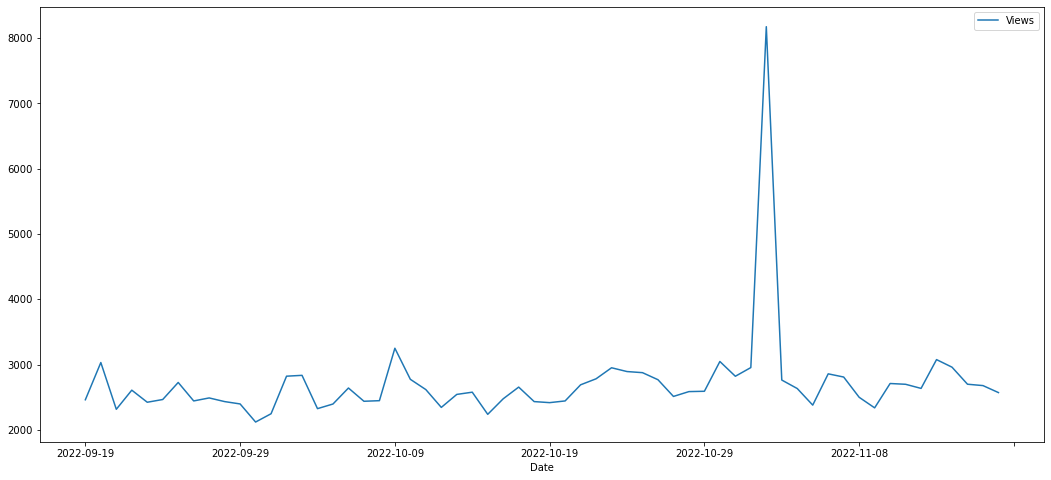

In [124]:
df.plot(x = 'Date', y = 'Views', figsize=(18,8))

### Zugriffszahlen für alle vier Millionenstädte in Deutschland

Schleife über alle vier Millionenstädte:

In [17]:
rows = []
cities = ['Berlin', 'Hamburg', 'Köln', 'München']

for c in cities:
    url = "https://de.wikipedia.org/w/api.php" # Endpunkt
    params = {
        "action": "query",
        "prop": "revisions",
        "titles": c,
        "prop": "pageviews",
        "pvipdays": 60,
        "format": "json"
    }
    r = requests.get(url = url, params = params)
    d = r.json()
    c = d['query']['pages']
    rows.append(c)
    time.sleep(1)

Datensatz erstellen:

In [18]:
Berlin = rows[0]['2552494']['pageviews']
Hamburg = rows[1]['2129']['pageviews']
Köln = rows[2]['2648']['pageviews']
München = rows[3]['3215']['pageviews']

In [19]:
df_berlin = pd.DataFrame(Berlin.items(), columns = ['Date', 'Views'])
df_berlin['City'] = 'Berlin'
df_hamburg = pd.DataFrame(Hamburg.items(), columns = ['Date', 'Views'])
df_hamburg['City'] = 'Hamburg'
df_köln = pd.DataFrame(Köln.items(), columns = ['Date', 'Views'])
df_köln['City'] = 'Köln'
df_münchen = pd.DataFrame(München.items(), columns = ['Date', 'Views'])
df_münchen['City'] = 'München'

In [20]:
df = pd.concat([df_berlin, df_hamburg, df_köln, df_münchen], ignore_index = True)
df.head()

,Date,Views,City
0,2022-09-24,3500.0,Berlin
1,2022-09-25,4245.0,Berlin
2,2022-09-26,4083.0,Berlin
3,2022-09-27,4330.0,Berlin
4,2022-09-28,3882.0,Berlin


Daten plotten:

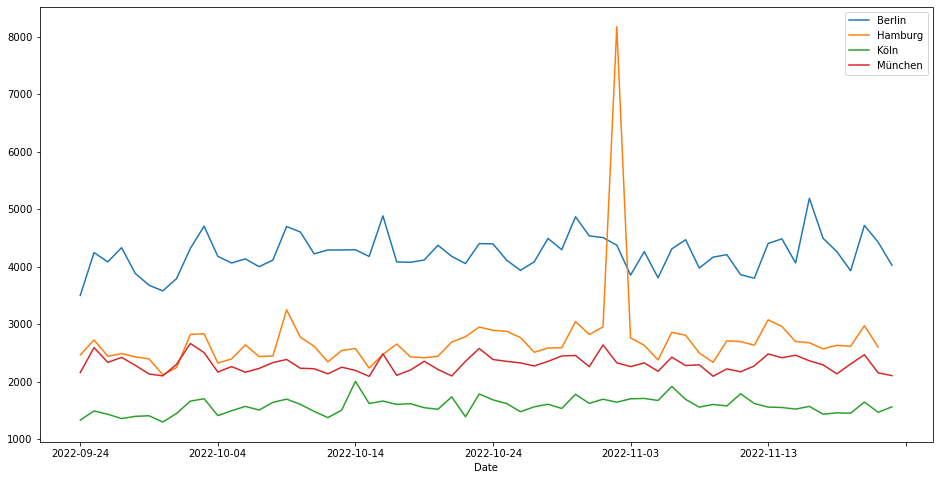

In [21]:
fig, ax = plt.subplots(figsize = (16,8))
df.groupby('City').plot(x = 'Date', y = 'Views', ax = ax)
plt.legend(df.groupby('City').groups.keys())